## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    ElasticNet,
    SGDRegressor
)
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)
from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler
)
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score
)
from sklearn.pipeline import Pipeline

## Data Loading

In [2]:
# Data source: https://github.com/nihalchandra011/Chicago-Taxi-Trips/raw/main/Taxi_Trips_Preprocessed.csv
!wget https://github.com/nihalchandra011/Chicago-Taxi-Trips/raw/main/Taxi_Trips_Preprocessed.csv

# Load the dataset
data = pd.read_csv('./Taxi_Trips_Preprocessed.csv')

# Metadata
print(f"Number of rows in the dataset: {len(data)}")
print(f"Columns in the dataset: {data.columns.values}")

--2023-07-08 12:03:43--  https://github.com/nihalchandra011/Chicago-Taxi-Trips/raw/main/Taxi_Trips_Preprocessed.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nihalchandra011/Chicago-Taxi-Trips/main/Taxi_Trips_Preprocessed.csv [following]
--2023-07-08 12:03:43--  https://raw.githubusercontent.com/nihalchandra011/Chicago-Taxi-Trips/main/Taxi_Trips_Preprocessed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25539484 (24M) [text/plain]
Saving to: ‘Taxi_Trips_Preprocessed.csv’

Taxi_Trips_Preproce 100%[===================>]  24.36M   125MB/s    in 0.2s    

2023-07-08 12:03:43 (125 MB/s) -

## Data Pre-processing

In [3]:
# Create a new instance of LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['Payment Type', 'Company']

# Encode each categorical column into numbers
for column in categorical_columns:
    data[column + '_encoded'] = label_encoder.fit_transform(data[column])

# Select relevant features for the model
features = [
    'Pickup Centroid Latitude',
    'Pickup Centroid Longitude',
    'Dropoff Centroid Latitude',
    'Dropoff Centroid Longitude',
    'Trip Day',
    'Trip Hour',
    'Trip Minutes',
    'Trip Miles',
    'Pickup Community Area',
    'Dropoff Community Area',
    'Payment Type_encoded',
    'Company_encoded'
]

# Remove rows with missing values, if any
data = data.dropna(subset=features + ['Fare'])

# Split the dataset into features (X) and target variable (y)
X = data[features]
y = data['Fare']

In [4]:
X.head()

,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Trip Day,Trip Hour,Trip Minutes,Trip Miles,Pickup Community Area,Dropoff Community Area,Payment Type_encoded,Company_encoded
0,41.892508,-87.626215,41.884987,-87.620993,6,11,2.100000,0.31,8,32,0,13
1,41.874005,-87.663518,41.874005,-87.663518,0,11,4.000000,0.00,28,28,1,24
2,41.809018,-87.659167,41.809018,-87.659167,4,18,0.000000,0.00,61,61,0,24
3,41.899602,-87.633308,41.857184,-87.620335,3,17,57.900000,13.94,8,33,5,12
4,41.870415,-87.675086,41.962179,-87.645379,3,9,22.016667,10.10,28,3,5,13


In [6]:
# Split the data into train and test in the ration 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Full dataset :\t{len(X)} rows\nTrain dataset :\t{len(X_train)} rows\nTest dataset :\t{len(X_test)} rows")

Full dataset :	79569 rows
Train dataset :	63655 rows
Test dataset :	15914 rows


In [7]:
# Define the regression models to test
regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SGDRegressor()
]

# Create a pipeline for each regression model
pipelines = []
for model in regression_models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Preprocessing step
        ('regressor', model)  # Regression model
    ])
    pipelines.append(pipeline)

# Fit the pipelines to the training data and evaluate performance on testing data
results = []
for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    # Metrics for evaluating test data
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_name = pipeline.named_steps['regressor'].__class__.__name__
    results.append(
        {
            'Model': model_name,
            'MSE': mse,
            'R2 Score': r2,
            'MAE': mae,
            'MAPE': mape
        }
    )

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Sort the results DataFrame by R2 score in descending order
results_df = results_df.sort_values('R2 Score', ascending=False)
results_df

,Model,MSE,R2 Score,MAE,MAPE
4,RandomForestRegressor,42.584496,0.827563,1.505298,5.737333e+13
6,SGDRegressor,65.044152,0.736617,4.168439,5.794174e+13
5,GradientBoostingRegressor,76.319876,0.690959,2.333322,5.817778e+13
0,LinearRegression,77.071518,0.687915,5.126041,6.498488e+13
1,Ridge,77.071816,0.687914,5.126086,6.498545e+13
2,Lasso,84.063516,0.659602,5.996941,6.924752e+13
3,ElasticNet,97.315532,0.605941,6.817540,7.270700e+13


In [8]:
# Initialize and fit the Random Forest regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Get the feature importance scores from the trained model
importance_scores = model_rf.feature_importances_

# Create a pandas DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Score': importance_scores
})

# Sort the DataFrame by importance score in descending order
sorted_df = feature_importance_df.sort_values('Importance Score', ascending=False)

# Display the sorted DataFrame
print(sorted_df)

                       Feature  Importance Score
6                 Trip Minutes          0.358700
10        Payment Type_encoded          0.159503
7                   Trip Miles          0.131098
4                     Trip Day          0.079310
1    Pickup Centroid Longitude          0.056553
2    Dropoff Centroid Latitude          0.052781
0     Pickup Centroid Latitude          0.043909
9       Dropoff Community Area          0.042754
8        Pickup Community Area          0.026817
3   Dropoff Centroid Longitude          0.026462
5                    Trip Hour          0.015184
11             Company_encoded          0.006929


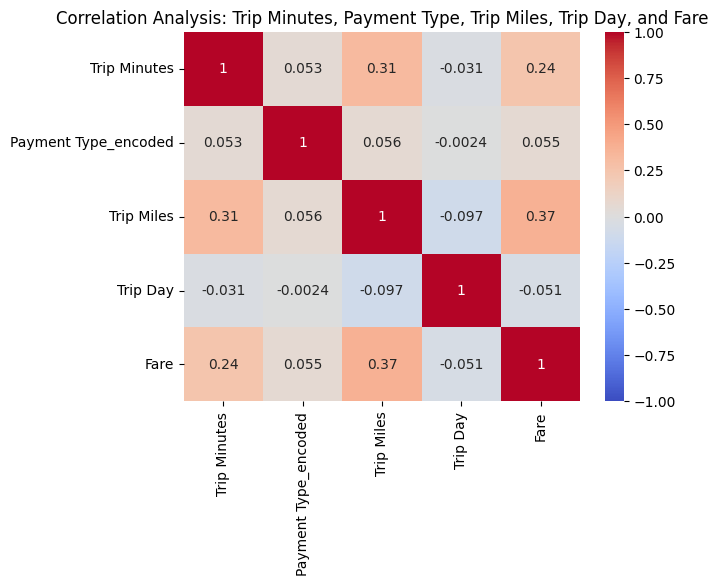

In [10]:
# Select the relevant columns for correlation analysis
correlation_columns = [
    'Trip Minutes',
    'Payment Type_encoded',
    'Trip Miles',
    'Trip Day',
    'Fare'
]
correlation_data = data[correlation_columns]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set plot title
plt.title('Correlation Analysis: Trip Minutes, Payment Type, Trip Miles, Trip Day, and Fare')

# Show the plot
plt.show()

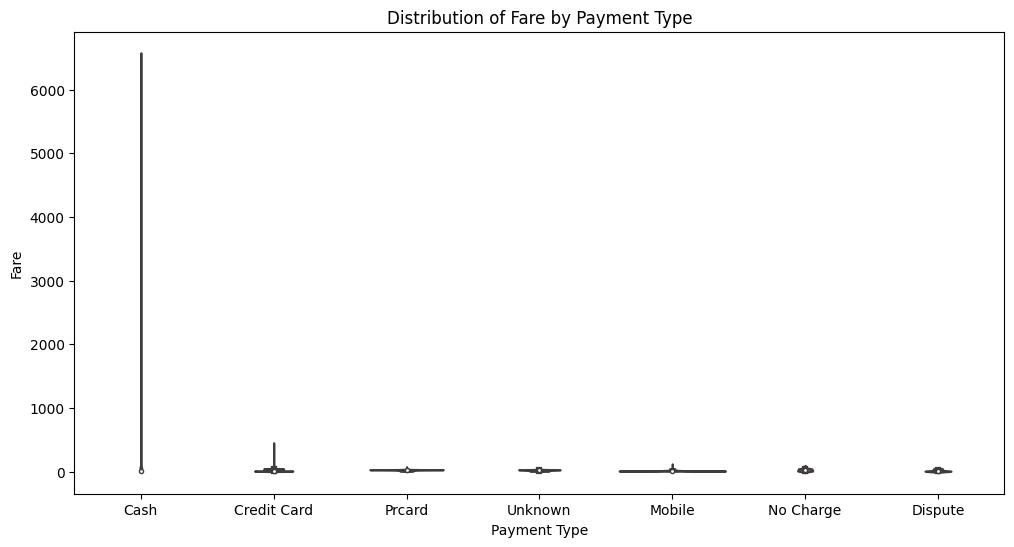

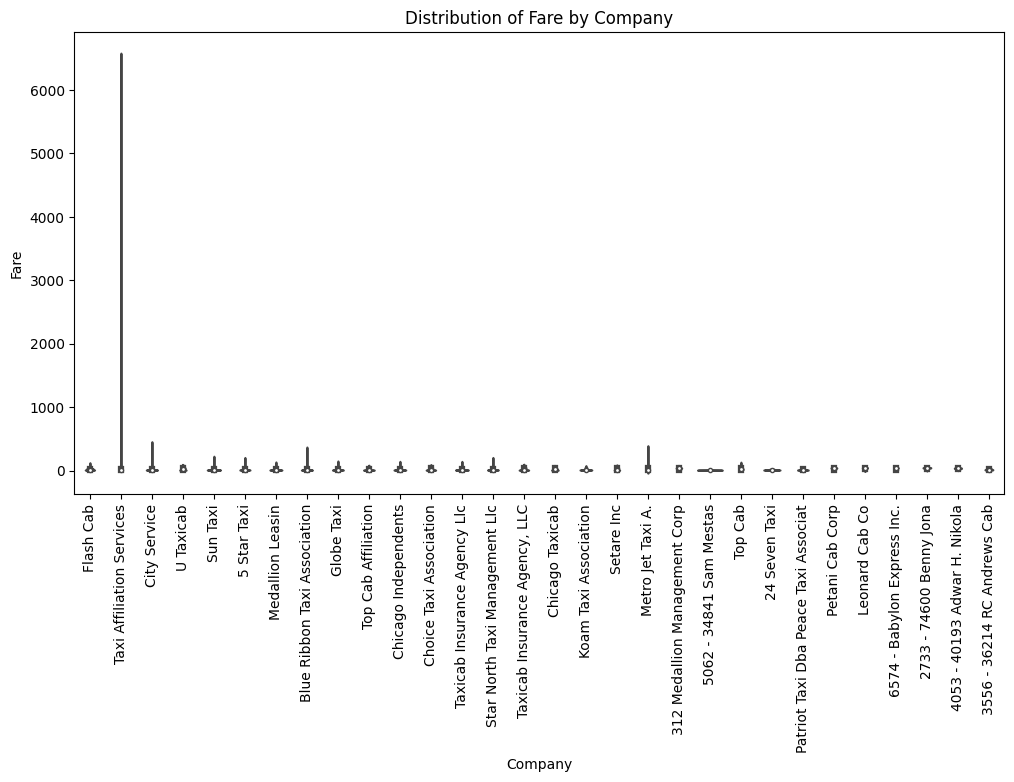

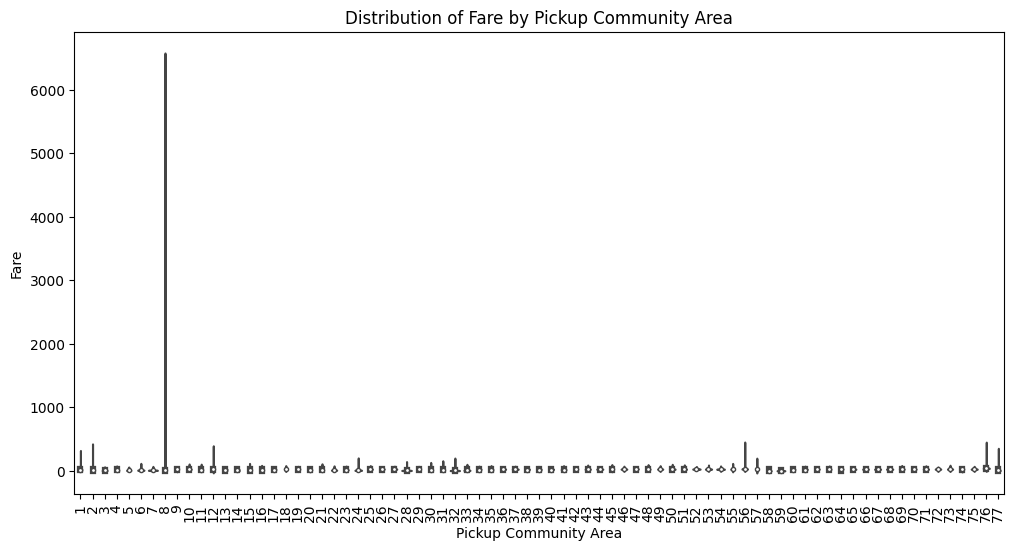

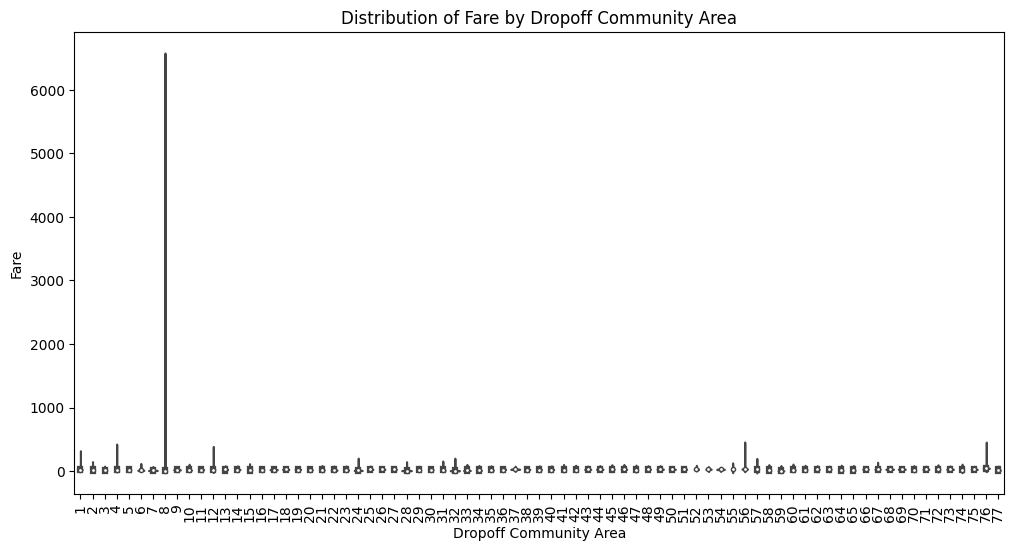

In [11]:
# Violin plot for Payment Type
plt.figure(figsize=(12, 6))
sns.violinplot(x='Payment Type', y='Fare', data=data)
plt.xlabel('Payment Type')
plt.ylabel('Fare')
plt.title('Distribution of Fare by Payment Type')
plt.show()

# Violin plot for Company
plt.figure(figsize=(12, 6))
sns.violinplot(x='Company', y='Fare', data=data)
plt.xlabel('Company')
plt.ylabel('Fare')
plt.title('Distribution of Fare by Company')
plt.xticks(rotation=90)
plt.show()

# Violin plot for Pickup Community Area
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pickup Community Area', y='Fare', data=data)
plt.xlabel('Pickup Community Area')
plt.ylabel('Fare')
plt.title('Distribution of Fare by Pickup Community Area')
plt.xticks(rotation=90)
plt.show()

# Violin plot for Dropoff Community Area
plt.figure(figsize=(12, 6))
sns.violinplot(x='Dropoff Community Area', y='Fare', data=data)
plt.xlabel('Dropoff Community Area')
plt.ylabel('Fare')
plt.title('Distribution of Fare by Dropoff Community Area')
plt.xticks(rotation=90)
plt.show()

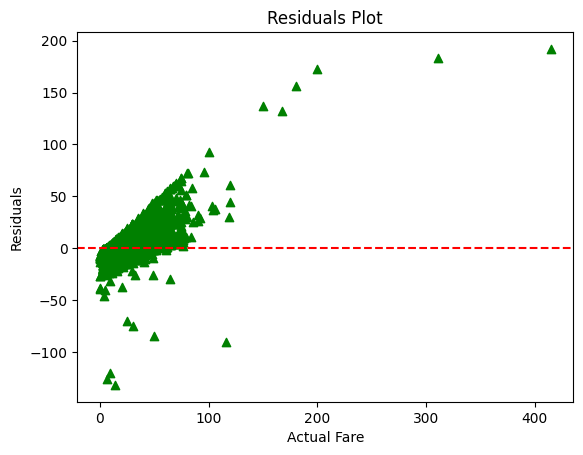

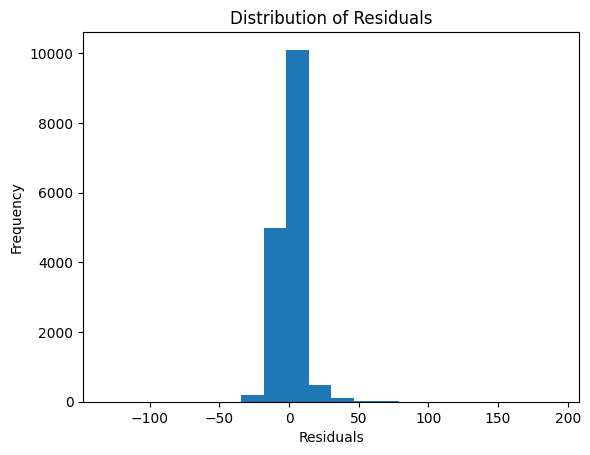

In [16]:
# Calculate the residuals
residuals = y_test - y_pred

# Scatter plot of residuals
plt.scatter(y_test, residuals, marker='^', c='g')
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at y=0
plt.xlabel('Actual Fare')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Distribution plot of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [9]:
# Example usage with time-related features
pickup_latitude = 41.89250778
pickup_longitude = -87.62621491
dropoff_latitude = 41.88498719
dropoff_longitude = -87.62099291
trip_miles = 0.31
trip_day = 6
trip_hour = 11
trip_minutes = 2.1
pickup_community_area = 8
dropoff_community_area = 32
payment_type = 0
company = 13


fare_estimate_combined = model_rf.predict([
    [
        pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude,
        trip_miles, trip_day, trip_hour, trip_minutes,
        pickup_community_area, dropoff_community_area, payment_type, company
    ]
])
print('Estimated Fare (with time):', fare_estimate_combined)


Estimated Fare (with time): [9.2625]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
